In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

In [3]:
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

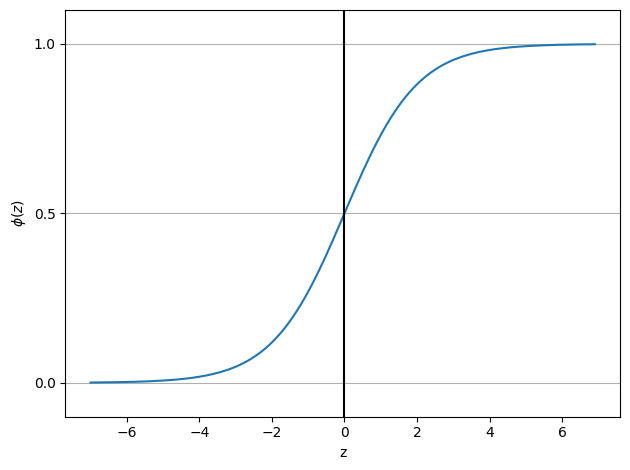

In [4]:
plt.plot(z, phi_z)
plt.axvline(0.0, color="k")
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

In [5]:
z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

In [6]:
def cost_1(z):
    return - np.log(sigmoid(z))

def cost_0(z):
    return - np.log(1 - sigmoid(z))

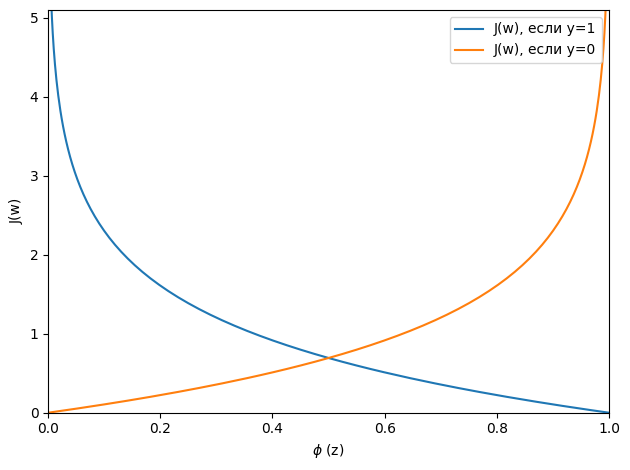

In [7]:
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w), если y=1')
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, label='J(w), если y=0')
plt.ylim([0.0, 5.1])
plt.xlim(0, 1)
plt.xlabel('$\phi$ (z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [8]:
from sklearn.datasets import load_iris

In [9]:
iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [10]:
print('Метки классов: ', np.unique(y))

Метки классов:  [0 1 2]


In [11]:
X[:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [12]:
X.shape

(150, 2)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [14]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

In [15]:
x = np.random.RandomState(1)
w = x.normal(loc=0.0, scale=0.01, size=1 + 2)
type(w)

numpy.ndarray

In [16]:
b = np.dot(X, w[1:]) + w[0]
b.shape

(150,)

In [17]:
class LogisticRegressionGD(object):
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        # случайным образом генерируем массив со значениями весов, включая смещение:
        rgen = np.random.RandomState(self.random_state)
        # длина массива равна количеству признаков + 1 (смещение)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        # пустой список издержек:
        self.cost_ = []
        # количество итераций равно n_iter
        for i in range(self.n_iter):
            # аргумент: массив признаков (shape = (j, i))
            net_input = self.net_input(X)
            # аргумент: массив значений линейной функции (shape = (j,))
            output = self.activation(net_input)
            # получаем массив со значениями ошибок
            errors = (y - output)
            # меняем значения угловых коэффициентов и смещения
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            # Вычисляем логистические издержки
            cost = (-y.dot(np.log(output)) -
                   ((1 - y).dot(np.log(1 - output))))
            self.cost_.append(cost)
        return self

    # возвращает массив, содержащий следующие значения:
    # к скалярному произведению векторов X и w_[1:] прибавляем w_[0]
    def net_input(self, X):
        """Вычисляет общий вход
        Параметр X - это массив признаков с shape = (j, i)
        Возвращает массив значений линейной функции с shape = (j,)
        """
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """Вычисляет логистическую сигмоидальную активацию
        Параметр z - это массив значений линейной функции с shape = (j,)
        Возвшащает массив из значений от 0.0 до 1.0 c shape = (j,)
        """
        #return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
        return 1.0 / (1.0 + np.exp(-z))

    def predict(self, X):
        """Возвращает метку класса после единичного шага"""
        #return np.where(self.net_input(X) >= 0.0, 1, 0)
        # эквивалентно:
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)


In [18]:
model = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)

In [19]:
model.fit(X_train_01_subset, y_train_01_subset)

In [20]:
model.predict(X_train_01_subset)

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0])

In [21]:
z = model.net_input(X_train_01_subset)

In [22]:
X_train_01_subset.shape

(70, 2)

In [23]:
z.shape

(70,)

In [24]:
y_train_01_subset.shape

(70,)

In [25]:
z[:5]

array([-6.9115544 , -5.84248017, -7.62427056, -7.62427056, 10.2895395 ])

In [26]:
activation = model.activation(z)

In [27]:
activation.shape

(70,)

In [33]:
activation

array([9.95216642e-04, 2.89324201e-03, 4.88212942e-04, 4.88212942e-04,
       9.99966014e-01, 9.83303377e-01, 9.99756972e-01, 6.97080399e-04,
       9.99959689e-01, 9.99711749e-01, 5.88314071e-03, 9.91743202e-01,
       9.99302963e-01, 2.02766991e-03, 9.99983085e-01, 9.99951465e-01,
       9.98315431e-01, 9.99985951e-01, 9.99798143e-01, 4.06575898e-03,
       9.99950734e-01, 2.02766991e-03, 9.95216642e-04, 1.66976529e-02,
       2.39435574e-04, 9.99995934e-01, 1.42068232e-03, 2.01869665e-04,
       9.99991706e-01, 4.89116107e-03, 9.91743202e-01, 9.99019607e-01,
       1.42068232e-03, 1.42068232e-03, 1.42068232e-03, 9.95934495e-01,
       1.18024214e-03, 9.99995934e-01, 6.97080399e-04, 9.99990014e-01,
       2.02766991e-03, 9.95216642e-04, 9.99882595e-01, 9.98802067e-01,
       9.99798143e-01, 9.99998805e-01, 9.99983085e-01, 9.99983085e-01,
       9.99979937e-01, 4.06575898e-03, 1.39077061e-02, 9.99998823e-01,
       1.42068232e-03, 9.99858647e-01, 2.40418181e-03, 9.95216642e-04,
      

In [28]:
model.cost_[-1]

0.1360328812771719

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')

In [31]:
lr.fit(X_train_01_subset, y_train_01_subset)

LogisticRegression(C=100.0, multi_class='ovr', random_state=1)

In [32]:
lr.predict(X_train)

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0])